## Install Pybullet and others libraries

In [ ]:
!sudo apt-get install -y xvfb ffmpeg


!pip install -U pybullet

!pip install git+https://github.com/eleurent/highway-env#egg=highway-env

!pip install box2d-py
!pip install gym[Box_2D]

!pip -q install pyglet
!pip -q install pyopengl
!pip install gym pyvirtualdisplay > /dev/nul
!apt-get update

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 784 kB of archives.
After this operation, 2,270 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.9 [784 kB]
Fetched 784 kB in 1s (1,071 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected pa

In [ ]:
# Visualization
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.notebook import trange
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
from gym.wrappers import Monitor
import base64

# commons libraries
from pathlib import Path
import time
import pandas as pd
import numpy as np
import pprint

import gym

# parkin-env
import highway_env

# MinitaurBulletEnv-v0
import pybullet_envs

## Auxiliar functions 

In [ ]:
display = Display(visible=0, size=(1400, 900))
display.start()

def evalRandom(env_aux, n_episodes= 100):
    '''
    Play n_episodes, return the time spent in seconds and rewards 
    generated per episode and plot the histograms
    input:
        end_aux: gym env to play (env)
        n_episodes: nº of episodes to play (int)
    output:
        rewards: list with rewards
        times: list wiht times
    '''
    # inicializate 2 empty list
    rewards= []
    times= []

    # play 100 episodes
    for epi in range(n_episodes):

        observation = env_aux.reset()
        start_time = time.time()
        epi_rewards = 0

        # play 1 episode
        done= False
        while not done:
            action = env_aux.action_space.sample() #random action
            observation, reward, done, info = env_aux.step(action) 
            epi_rewards += reward
            if done:
                rewards.append(epi_rewards)
                times.append(time.time() - start_time)
                break;
        
    env.close() #close env

    #plots
    fig= plt.figure(figsize=(10,4))
    ax1= fig.add_subplot(121)
    ax2= fig.add_subplot(122)

    ax1.hist(rewards)
    ax1.set_title('Rewards per episode')
    ax1.set_ylabel('Frecuency')
    ax1.set_xlabel('Rewards')

    ax2.hist(times)
    ax2.set_ylabel('Frecuency')
    ax2.set_title('Episode durations')
    ax2.set_xlabel('Seconds')
    plt.show()
    print('Time spent (s) ', np.array(times).sum())

    return rewards, times

def show_video(path):
    html = []
    for mp4 in Path(path).glob("*.mp4"):
        video_b64 = base64.b64encode(mp4.read_bytes())
        html.append('''<video alt="{}" autoplay 
                      loop controls style="height: 400px;">
                      <source src="data:video/mp4;base64,{}" type="video/mp4" />
                 </video>'''.format(mp4, video_b64.decode('ascii')))
    ipythondisplay.display(ipythondisplay.HTML(data="<br>".join(html)))



## **MinitaurBulletEnv-v0**

This enviroment simulated a 8-joints walker robot. 

- The rewards of the env. is the distance traveled minus the energy spent.
- The env end when the robot fall or the distance threshold is achieved.


In [ ]:
ENV_ID = "MinitaurBulletEnv-v0"

env = gym.make(ENV_ID)

current_dir=/usr/local/lib/python3.6/dist-packages/pybullet_envs/bullet
urdf_root=/usr/local/lib/python3.6/dist-packages/pybullet_data


/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Observation space: Box(-167.72488403320312, 167.72488403320312, (28,), float32)
Action space: Box(-1.0, 1.0, (8,), float32)

actions example
   motor_1  motor_2   motor_3   motor_4   motor_5   motor_6   motor_7   motor_8
0  0.42878 -0.86441  0.809523  0.235631  0.057033 -0.783609 -0.952954  0.705139

Observations
             motor_1   motor_2   motor_3  ...   motor_6   motor_7   motor_8
angles       1.49787    1.4867   1.49217  ...   1.50472   1.50014   1.50121
velocities  0.830001  0.847349  0.845503  ...  0.736496  0.770485  0.753746
torques     0.466082  0.555401  0.510824  ...  0.422492  0.455082  0.448933

[3 rows x 8 columns]
orientations:  [-1.51861827e-03  9.79745315e-04 -3.20917118e-04  9.99998315e-01]


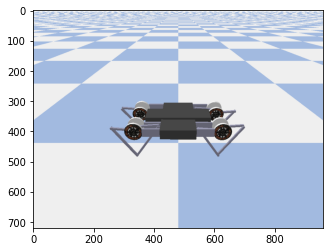

In [ ]:
# number of motors
n_motors = 8 # 2 motors per leg

# inicializate 2 empty df
cols = ['motor_' + str(x + 1) for x in range(n_motors)]

obs_minitaur= pd.DataFrame(columns= [x for x in cols], index= ['angles', 'velocities', 'torques'])
actionss_minitaur= pd.DataFrame(columns= [x for x in cols])

# start the env
obs= env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

print()
print('actions example')
actionss_minitaur.loc[len(actionss_minitaur)]= env.action_space.sample()
print(actionss_minitaur)

print()
print('Observations')
angles= obs[:8]
velocities= obs[8:16]
torques= obs[16:24]
orientations= obs[24:]

obs_minitaur.loc['angles']= angles
obs_minitaur.loc['velocities']= velocities
obs_minitaur.loc['torques']= torques
print(obs_minitaur)
print('orientations: ', orientations) 

env.close()

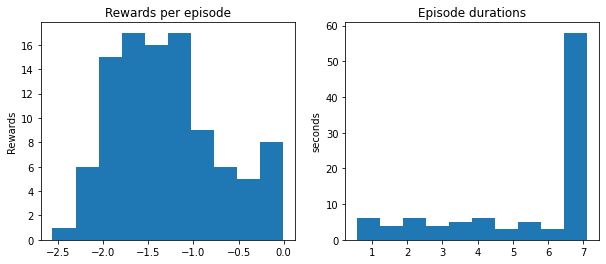

Time spent (s)  539.1701340675354


In [ ]:
rewards, times = evalRandom(env, 100)

### Experiment result with random actions

### Example

In [ ]:
reward= 0

obs= env.reset()
env = Monitor(env, './video/minitaur', force=True, video_callable=lambda episode: True)
env.reset()

start_time = time.time()
done = False
while not done:
    action = env.action_space.sample()
    obs, r, done, info = env.step(action)
    reward += r
env.close()
show_video('./video/minitaur')

In [ ]:
print('seconds: ',(time.time() - start_time))
print('Reward: ',reward)
print(info)

seconds:  174.8746280670166
Reward:  -1.0957104542842468
{}


### **References:**



*   [ pybullet env ](https://github.com/bulletphysics/bullet3/blob/master/examples/pybullet/gym/pybullet_envs/minitaur/envs/minitaur_gym_env.py)
*   [Deep Reinforcement Learning Hands-On secon edition (Github)](https://github.com/PacktPublishing/Deep-Reinforcement-Learning-Hands-On-Second-Edition/tree/master/Chapter17)





## BipedalWalker-v3

### Env description

Reward is given for moving forward, total 300+ points up to the far end. If the robot falls, it gets -100. Applying motor torque costs a small amount of points, more optimal agent will get better score. State consists of hull angle speed, angular velocity, horizontal speed, vertical speed, position of joints and joints angular speed, legs contact with ground, and 10 lidar rangefinder measurements. There's no coordinates in the state vector.

The episode ends when the robot body touches ground or the robot reaches far right side of the environment.

In [ ]:
ENV_ID = "BipedalWalker-v3"

env = gym.make(ENV_ID)

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


**Observations  Box(24)**

Num   | Observation                |  Min   |   Max  | Mean
------|----------------------------|--------|--------|------   
0     | hull_angle                 |  0     |  2*pi  |  0.5
1     | hull_angularVelocity       |  -inf  |  +inf  |  -
2     | vel_x                      |  -1    |  +1    |  -
3     |  vel_y                     |  -1    |  +1    |  -
4     | hip_joint_1_angle          |  -inf  |  +inf  |  -
5     | hip_joint_1_speed          |  -inf  |  +inf  |  -
6     | knee_joint_1_angle         |  -inf  |  +inf  |  -
7     | knee_joint_1_speed         |  -inf  |  +inf  |  -
8     | leg_1_ground_contact_flag  |  0     |  1     |  -
9     | hip_joint_2_angle          |  -inf  |  +inf  |  -
10    | hip_joint_2_speed          |  -inf  |  +inf  |  -
11    | knee_joint_2_angle         |  -inf  |  +inf  |  -
12    | knee_joint_2_speed         |  -inf  |  +inf  |  -
13    | leg_2_ground_contact_flag  |  0     |  1     |  -
14-23 | 10 lidar readings          |  -inf  |  +inf  |  -

**Actions:** 
Type: Box(4) - Torque control(default) / Velocity control - Change inside *bipedal_walker.py line 363*

Num | Name                        | Min  | Max  
----|-----------------------------|------|------
0   | Hip_1 (Torque / Velocity)   |  -1  | +1
1   | Knee_1 (Torque / Velocity)  |  -1  | +1
2   | Hip_2 (Torque / Velocity)   |  -1  | +1
3   | Knee_2 (Torque / Velocity)  |  -1  | +1

Observation space: Box(-inf, inf, (24,), float32)
Action space: Box(-1.0, 1.0, (4,), float32)

actions example
[ 0.3706103  -0.75486004 -0.35175818  0.38115007]

Observation example
[ 2.74517364e-03  1.45532156e-05 -1.89767808e-03 -1.60000980e-02
  9.26183015e-02  4.40535368e-03  8.59649628e-01 -2.10022399e-03
  1.00000000e+00  3.29006426e-02  4.40517114e-03  8.53467405e-01
 -2.99742787e-03  1.00000000e+00  4.40813214e-01  4.45819318e-01
  4.61421937e-01  4.89549309e-01  5.34101844e-01  6.02459908e-01
  7.09147573e-01  8.85930181e-01  1.00000000e+00  1.00000000e+00]


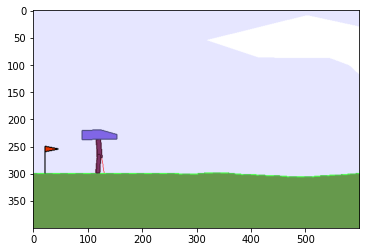

In [ ]:
# start the env
obs= env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

print()
print('actions example')
print(env.action_space.sample())
print()
print('Observation example')
print(obs)
env.close()

### Experiment result with random actions

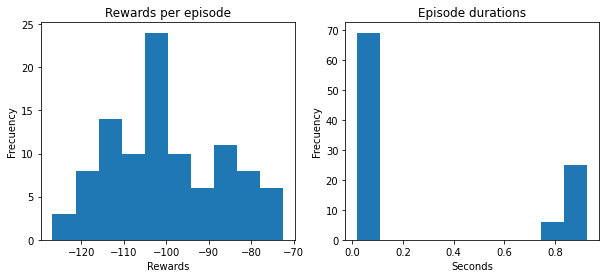

Time spent (s)  29.22322916984558


In [ ]:
rewards, times = evalRandom(env, 100)

### Example

In [ ]:
reward= 0

obs= env.reset()
env = Monitor(env, './video/bipedal', force=True, video_callable=lambda episode: True)
env.reset()

start_time = time.time()
done = False
while not done:
    action = env.action_space.sample()
    obs, r, done, info = env.step(action)
    reward += r
env.close()
show_video('./video/bipedal')

In [ ]:
print('seconds: ',(time.time() - start_time))
print('Reward: ',reward)
print(info)

seconds:  1.728606939315796
Reward:  -101.76187465132804
{}


### References



*   Refined Continuous Control of DDPG Actors via Parametrised Activation
*   POET: open-ended coevolution of environments and their optimized solutions




# CarRacing-v0

In [ ]:
ENV_ID = "CarRacing-v0"

env = gym.make(ENV_ID)

/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Track generation: 1009..1267 -> 258-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation: 1214..1522 -> 308-tiles track
Observation space: Box(0, 255, (96, 96, 3), uint8)
Action space: Box(-1.0, 1.0, (3,), float32)

actions example
[-0.6278587   0.1199718   0.57559425]

Observation example
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


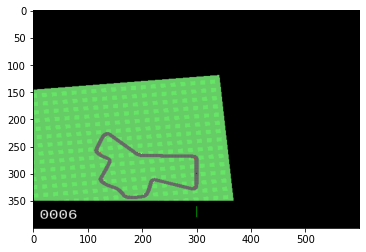

In [ ]:
# start the env
obs= env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

print()
print('actions example')
print(env.action_space.sample())
print()
print('Observation example')
print(obs)
env.close()

## Experiment result with random actions

In [ ]:
%%script false
rewards, times = evalRandom(env, 100)

#### **Memory RAM overflows**

# LunarLanderContinuous-v2

In [ ]:
ENV_ID = "LunarLanderContinuous-v2"

env = gym.make(ENV_ID)

**Rewards**

Reward for moving from the top of the screen to the landing pad and zero speed is about 100..140 points.
If the lander moves away from the landing pad it loses reward. The episode finishes if the lander crashes or
comes to rest, receiving an additional -100 or +100 points. Each leg with ground contact is +10 points.
Firing the main engine is -0.3 points each frame. Firing the side engine is -0.03 points each frame.
Solved is 200 points.

The landing pad is always at coordinates (0,0). The coordinates are the first two numbers in the state vector.

**Observation:**


1.  Horizontal coordinate.
2.  Vertical coordinate.
3.  Horizontal speed.
4.  Vertical speed.
5.  Angle
6.  Angular speed
7.  1 if the first leg has contact, else 0.
8.  1 if the second leg has contact, else 0.

**Actions**

1. Left engine.
2. Righ engine.

[Github](https://github.com/openai/gym/blob/master/gym/envs/box2d/lunar_lander.py)


Observation space: Box(-inf, inf, (8,), float32)
Action space: Box(-1.0, 1.0, (2,), float32)

actions example
[-0.27000055 -0.6688519 ]

Observation example
{'h_cord': -0.0039260862, 'v_cord': 1.4015914, 'h_speed': -0.39769313, 'v_speed': -0.41461644, 'angle': 0.0045562075, 'angular_speed': 0.09008337, 'leg_1': 0.0, 'leg_2': 0.0}


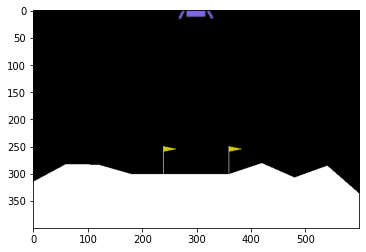

In [ ]:
# start the env
obs= env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

print()
print('actions example')
print(env.action_space.sample())
print()
print('Observation example')
rocket_obs= {'h_cord': obs[0], 'v_cord': obs[1], 'h_speed': obs[2], 
             'v_speed': obs[3], 'angle': obs[4], 'angular_speed': obs[5], 
             'leg_1': obs[6], 'leg_2': obs[7]}
print(rocket_obs)
env.close()

### Experiment result with random actions

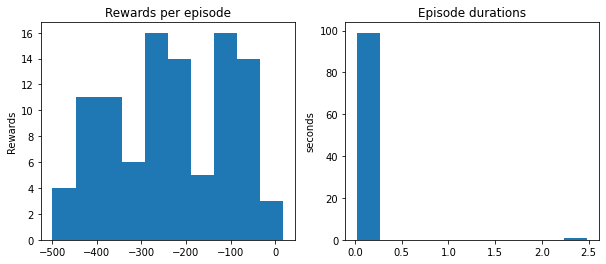

Time spent (s)  6.982799291610718


In [ ]:
rewards, times = evalRandom(env, 100)

### Example

In [ ]:
reward= 0

obs= env.reset()
env = Monitor(env, './video/lunarlander', force=True, video_callable=lambda episode: True)
env.reset()

start_time = time.time()
done = False
while not done:
    action = env.action_space.sample()
    obs, r, done, info = env.step(action)
    reward += r
env.close()
show_video('./video/lunarlander')

In [ ]:
print('seconds: ',(time.time() - start_time))
print('Reward: ',reward)
print(info)

seconds:  1.9131100177764893
Reward:  -251.30354433935128
{}


# Parking-v0

In [ ]:
ENV_ID = 'parking-v0'

env = gym.make(ENV_ID)

A goal-conditioned continuous control task in which the ego-vehicle must park in a given space with the appropriate heading.

**Actions**

The ContinuousAction type allows the agent to directly set the low-level controls of the vehicle kinematics, namely the throttle **a** and steering angle $\delta$.

**state**

1.   Horizontal coordinate (x)
2.   Vertical coordinate (y)
3.   Horizontal speed (vx)
4.   Vertical speed (vy)
5.   cosinus angle (cos_h)
6.   sinus angle (sin_h)

**Reward**

$$R(s,a) = -\| s - s_g \|_{W,p}^p - b\,\text{collision}$$

where:

 $s = [x, y, v_x, v_y, \cos\psi, \sin\psi]$ 
 
 $s_g = [x_g, y_g, 0, 0, \cos\psi_g, \sin\psi_g]$
 
 $\|x\|_{W,p} = (\sum_i |W_i x_i|^p)^{1/p}$. 
 
 We use a p-norm rather than an Euclidean norm in order to have a narrower spike of rewards at the goal.

**The episode end if the ego-vehicle:**


1.   Crashed
2.   Nº steps > Durations steps (100)
3.   Goal is reached


[Github](https://highway-env.readthedocs.io/en/latest/index.html)


In [ ]:
pprint.pprint(env.config)

{'action': {'type': 'ContinuousAction'},
 'centering_position': [0.5, 0.5],
 'controlled_vehicles': 1,
 'duration': 100,
 'manual_control': False,
 'observation': {'features': ['x', 'y', 'vx', 'vy', 'cos_h', 'sin_h'],
                 'normalize': False,
                 'scales': [100, 100, 5, 5, 1, 1],
                 'type': 'KinematicsGoal'},
 'offscreen_rendering': False,
 'other_vehicles_type': 'highway_env.vehicle.behavior.IDMVehicle',
 'policy_frequency': 5,
 'real_time_rendering': False,
 'render_agent': True,
 'scaling': 7,
 'screen_height': 300,
 'screen_width': 600,
 'show_trajectories': False,
 'simulation_frequency': 15}


Observation space: Dict(achieved_goal:Box(-inf, inf, (6,), float32), desired_goal:Box(-inf, inf, (6,), float32), observation:Box(-inf, inf, (6,), float32))
Action space: Box(-1.0, 1.0, (2,), float32)

actions example
[0.6320812 0.4777241]

Observation example
{'observation': array([0.        , 0.        , 0.        , 0.        , 0.64103058,
       0.76751534]), 'achieved_goal': array([0.        , 0.        , 0.        , 0.        , 0.64103058,
       0.76751534]), 'desired_goal': array([ 1.000000e-01, -1.400000e-01,  0.000000e+00,  0.000000e+00,
        6.123234e-17, -1.000000e+00])}


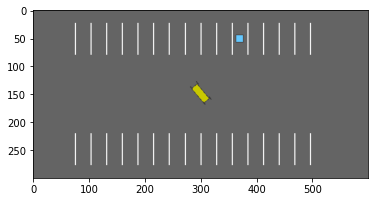

In [ ]:
# start the env
obs= env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

print()
print('actions example')
print(env.action_space.sample())
print()
print('Observation example')
print(obs)
env.close()

### Experiment result with random actions

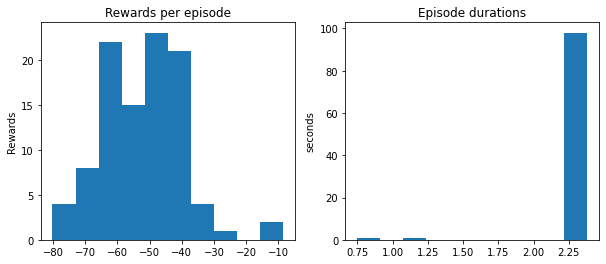

Time spent (s)  227.57402873039246


In [ ]:
rewards, times = evalRandom(env, 100)

### Example

In [ ]:
reward= 0
t= 0

obs= env.reset()
env = Monitor(env, './video/parking', force=True, video_callable=lambda episode: True)
env.reset()

start_time = time.time()
done = False
while not done:
    t += 1
    action = env.action_space.sample()
    obs, r, done, info = env.step(action)
    reward += r
env.close()
show_video('./video/parking')

In [ ]:
print('seconds: ',(time.time() - start_time))
print('Reward: ',reward)
print(info)

seconds:  9.3106210231781
Reward:  -51.29749869578185
{'speed': 6.169735506176949, 'crashed': False, 'action': array([0.73767096, 0.43040693], dtype=float32), 'is_success': False}


# MountainCarContinous-v0

In [ ]:
ENV_ID = 'MountainCarContinuous-v0'

env = gym.make(ENV_ID)

An underpowered car must climb a one-dimensional hill to reach a target.

**Reward**

Reward is 100 for reaching the target of the hill on the right hand side, minus the squared sum of actions from start to goal.

This reward function raises an exploration challenge, because if the agent does not reach the target soon enough, it will figure out that it is better not to move, and won't find the target anymore.

**Note that this reward is unusual with respect to most published work, where the goal was to reach the target as fast as possible, hence favouring a bang-bang strategy.**

**Observation**

Type: Box(2)

Num | Observation  | Min | Max  
----|--------------|-----|----   
0   | Car Position | -1.2| 0.6 
1   | Car Velocity | -0.07| 0.07

Note that velocity has been constrained to facilitate exploration, but this constraint might be relaxed in a more challenging version.

**Actions**

Type: Box(1)

Num | Action  
----|-------  
0   | Push car to the left (negative value) or to the right (positive value)

Observation space: Box(-1.2000000476837158, 0.6000000238418579, (2,), float32)
Action space: Box(-1.0, 1.0, (1,), float32)

actions example
[0.63868594]

Observation example
[-0.48956482  0.        ]


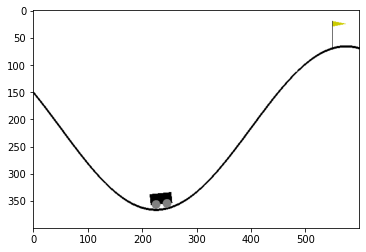

In [ ]:
# start the env
obs= env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

print()
print('actions example')
print(env.action_space.sample())
print()
print('Observation example')
print(obs)
env.close()

### Experiment result with random actions

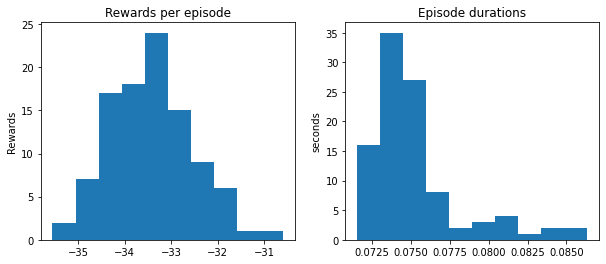

Time spent (s)  7.5283496379852295


In [ ]:
rewards, times = evalRandom(env, 100)

In [ ]:
reward= 0
t= 0
obs= env.reset()
env = Monitor(env, './video/mountain', force=True, video_callable=lambda episode: True)
env.reset()

start_time = time.time()
done = False
while not done:
    t +=1
    action = env.action_space.sample()
    obs, r, done, info = env.step(action)
    reward += r
env.close()
show_video('./video/mountain')

In [ ]:
print('seconds: ',(time.time() - start_time))
print('Reward: ',reward)
print(done)
print('Steps: ', t)

seconds:  11.240793704986572
Reward:  -31.638061897484214
True
Steps:  999
